In [1]:
import matplotlib.pyplot as plt
from datasets import load_dataset

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary resources from nltk
nltk.download('punkt')
nltk.download('stopwords')

dataset = load_dataset("cnn_dailymail", '3.0.0')
df = dataset['train'].to_pandas()
df = df.head(1000)

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert to lower case
    tokens = [token.lower() for token in tokens]
    # Remove stop words (optional)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return " ".join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaicahana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaicahana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
###====== Part 2.1 =====================
###Write a code that creates two new columns -  artice_len and highlights_len
df['article_len'] = [len(df['article'][i]) for i in range(len(df['article']))]
df['highlight_len'] = [len(df['highlights'][i]) for i in range(len(df['highlights']))]

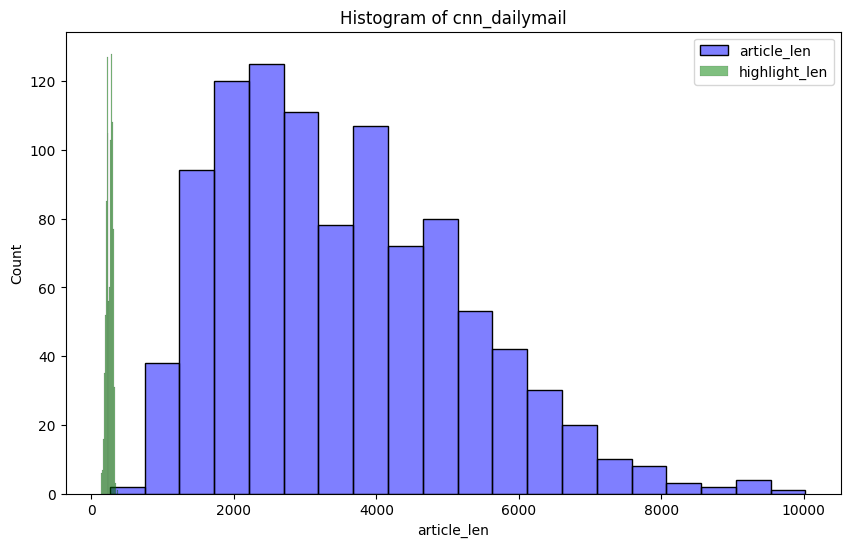

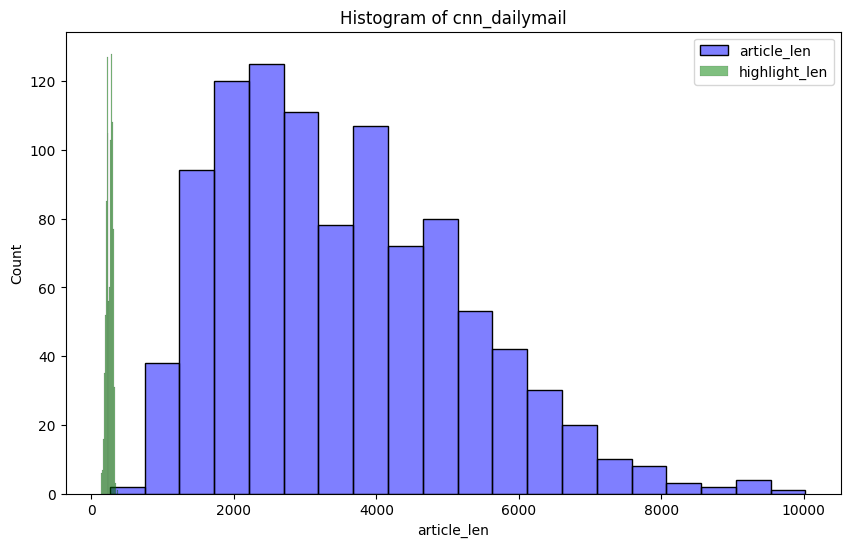

In [30]:

import seaborn as sns

###====== Part 2.2 =====================
### Fill in this code
def plot_histograms(df):
    p = plt.figure(figsize=(10, 6))
    sns.histplot(data=df['article_len'], alpha=0.5, label='Distribution 1', color='blue')
    sns.histplot(data=df['highlight_len'], alpha=0.5, label='Distribution 1', color='green')
    plt.legend(['article_len','highlight_len'])
    plt.title('Histogram of cnn_dailymail')
    return p

plot_histograms(df)



In [ ]:

###======Part 2.3 ================
### Fill in the code
def ngrams(text, n):
    # Preprocess the text first
    processed_text = preprocess_text(text)
    words = processed_text.split()
    return set(zip(*[words[i:] for i in range(n)]))


def rouge_n(reference, candidate, n):
    return 0.0
###=========== 2.3 ================    

In [ ]:


# Example of calculating Rouge-1 and Rouge-2 for a dataframe
df['rouge_1'] = df.apply(lambda row: rouge_n(row['highlights'], row['article'], 1), axis=1)
df['rouge_2'] = df.apply(lambda row: rouge_n(row['highlights'], row['article'], 2), axis=1)

plt.figure(figsize=(12, 6))
plt.hist(df['rouge_2'], bins=30, color='blue', alpha=0.7)
plt.title('Rouge-2 score distribution on ground truth')

max_rouge_2_index = df['rouge_2'].argmax()
print("Index of article with highest Rouge-2 score:", max_rouge_2_index)
print("========================\n")
print("Article with highest Rouge-2 score:", df.iloc[max_rouge_2_index]['article'])
print("========================\n\n\n")
print("Highlights with highest Rouge-2 score:", df.iloc[max_rouge_2_index]['highlights'])

